In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,cross_val_predict
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [2]:
df_crop1 = pd.read_csv(r"C://Users/v-kas/OneDrive/Desktop/MachineLearning_project/Crop_Damage_Dataset_Prediction.csv")
df_crop1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,Kharif,Alluvial,Insecticides,0,0.0,0,Summer,Minimal Damage
1,F00000003,209,Kharif,Alluvial,Insecticides,0,0.0,0,Monsoon,Partial Damage
2,F00000004,257,Kharif,Alluvial,Insecticides,0,0.0,0,Monsoon,Partial Damage
3,F00000005,257,Kharif,Black-Cotton,Insecticides,0,0.0,0,Monsoon,Partial Damage
4,F00000006,342,Kharif,Alluvial,Insecticides,0,0.0,0,Monsoon,Partial Damage


# Data Pre-Processing : Null Values, Outliers

In [3]:
df_crop1.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [4]:
df_crop1 = df_crop1.drop('ID', axis=1)

In [5]:
# Calculating the mean values for the feature : Number_Weeks_Used 
mean = df_crop1['Number_Weeks_Used'].mean()
print('The mean value of Number_Weeks_Used feature is:',mean)
# Filling the null values with the mean values for the feature Number_Weeks_Used
df_crop1['Number_Weeks_Used'].fillna(mean, inplace=True)


The mean value of Number_Weeks_Used feature is: 28.62397004683313


In [6]:
le_Crop_Type = LabelEncoder()
df_crop1['Crop_Type'] = le_Crop_Type.fit_transform(df_crop1['Crop_Type'])
df_crop1["Crop_Type"].unique()

array([0, 1])

In [7]:
le_Soil_Type = LabelEncoder()
df_crop1['Soil_Type'] = le_Soil_Type.fit_transform(df_crop1['Soil_Type'])
df_crop1["Soil_Type"].unique()

array([0, 1])

In [8]:
le_Season = LabelEncoder()
df_crop1['Season'] = le_Season.fit_transform(df_crop1['Season'])
df_crop1["Season"].unique()


array([1, 0, 2])

In [9]:
le_Pesticide_Use_Category = LabelEncoder()
df_crop1['Pesticide_Use_Category'] = le_Pesticide_Use_Category.fit_transform(df_crop1['Pesticide_Use_Category'])
df_crop1["Pesticide_Use_Category"].unique()

array([2, 0, 1])

In [10]:
le_Crop_Damage = LabelEncoder()
df_crop1['Crop_Damage'] = le_Crop_Damage.fit_transform(df_crop1['Crop_Damage'])
df_crop1["Crop_Damage"].unique()

array([0, 1, 2])

In [11]:
df_crop1.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,0,0,2,0,0.0,0,1,0
1,209,0,0,2,0,0.0,0,0,1
2,257,0,0,2,0,0.0,0,0,1
3,257,0,1,2,0,0.0,0,0,1
4,342,0,0,2,0,0.0,0,0,1


In [12]:
df_crop1.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [13]:
df_crop1.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.715625,0.458417,0.735814,25.849952,28.623970,9.589986,0.702177,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,11.747567,9.900631,0.780100,0.454215
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,731.000000,0.000000,0.000000,0.000000,15.000000,20.000000,0.000000,0.000000,0.000000
50%,1212.000000,1.000000,0.000000,1.000000,20.000000,28.623970,7.000000,1.000000,0.000000
75%,1898.000000,1.000000,1.000000,1.000000,40.000000,36.000000,16.000000,1.000000,0.000000
max,4097.000000,1.000000,1.000000,2.000000,95.000000,67.000000,50.000000,2.000000,2.000000


In [14]:
# Shape the dataframe
df_crop1.shape

(88858, 9)

In [15]:
# Define the columns to check for outliers
columns = ['Estimated_Insects_Count', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

# Iterate over the columns
for column in columns:
    # Get the interquartile range (IQR) of the data
    q1 = df_crop1[column].quantile(0.25)
    q3 = df_crop1[column].quantile(0.75)
    iqr = q3 - q1

    # Define the threshold for outliers
    outlier_threshold = 1.5 * iqr

    # Find the outliers
    outliers = df_crop1[(df_crop1[column] < (q1 - outlier_threshold)) | (df_crop1[column] > (q3 + outlier_threshold))][column]

    # Get the count of outliers
    outlier_count = len(outliers)

    print(f'There are {outlier_count} outliers in the {column} column.')
    
    # Remove the outliers
    df_crop1 = df_crop1.drop(outliers.index)


There are 1452 outliers in the Estimated_Insects_Count column.
There are 791 outliers in the Number_Doses_Week column.
There are 199 outliers in the Number_Weeks_Used column.
There are 255 outliers in the Number_Weeks_Quit column.


In [16]:
# Count of observations after removing outliers:
df_crop1.shape

(86161, 9)

In [17]:
# Split the data into training and testing sets
X = df_crop1.drop(['Crop_Damage','Crop_Type'], axis=1)
y = df_crop1['Crop_Damage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60312, 7) (60312,)
(25849, 7) (25849,)


In [18]:
print(X.head())

   Estimated_Insects_Count  Soil_Type  Pesticide_Use_Category  \
0                      188          0                       2   
1                      209          0                       2   
2                      257          0                       2   
3                      257          1                       2   
4                      342          0                       2   

   Number_Doses_Week  Number_Weeks_Used  Number_Weeks_Quit  Season  
0                  0                0.0                  0       1  
1                  0                0.0                  0       0  
2                  0                0.0                  0       0  
3                  0                0.0                  0       0  
4                  0                0.0                  0       0  


In [19]:
import time
knn = KNeighborsClassifier(n_neighbors=7)

start_time = time.time()

# Fit KNN classifier on train set
knn.fit(X_train, y_train)

end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.4f} seconds".format(training_time))
print('_________________________________________________________________________')
# Generate classification report on test set
y_pred = knn.predict(X_test)
KNN_Accu = accuracy_score(y_pred, y_test)
print('_________________________________________________________________________')
print("KNN accuracy: ", KNN_Accu)
print('_________________________________________________________________________')
print("\nClassification Report of KNN algortihm:\n ",classification_report(y_test, y_pred))
print('_________________________________________________________________________')
cm_KNN = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm_KNN)

# Get the classification report


Training time: 0.1721 seconds
_________________________________________________________________________


C:\Users\v-kas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


_________________________________________________________________________
KNN accuracy:  0.8334171534682193
_________________________________________________________________________

Classification Report of KNN algortihm:
                precision    recall  f1-score   support

           0       0.86      0.97      0.91     21723
           1       0.38      0.16      0.22      3453
           2       0.22      0.02      0.04       673

    accuracy                           0.83     25849
   macro avg       0.49      0.38      0.39     25849
weighted avg       0.78      0.83      0.80     25849

_________________________________________________________________________
Confusion matrix:
 [[20982   719    22]
 [ 2878   547    28]
 [  488   171    14]]


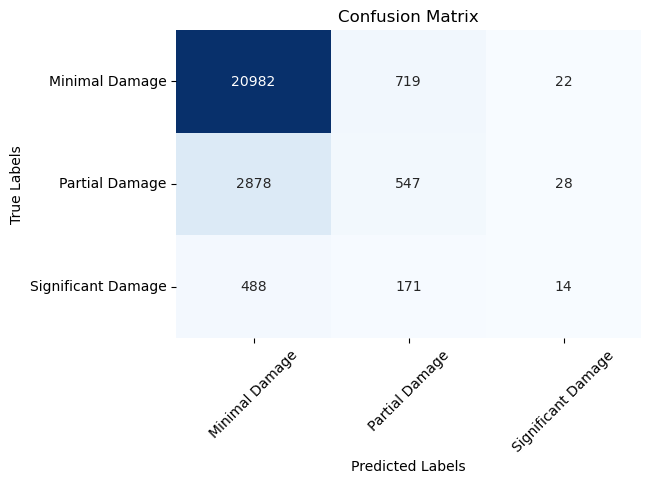

In [55]:
# cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_KNN, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
acc_rate1=[]

for i in range(1,20,2):
    knn=KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    acc=accuracy_score(y_test, y_pred, normalize=True)*float(100)
    acc_rate1.append(acc)

C:\Users\v-kas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\v-kas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

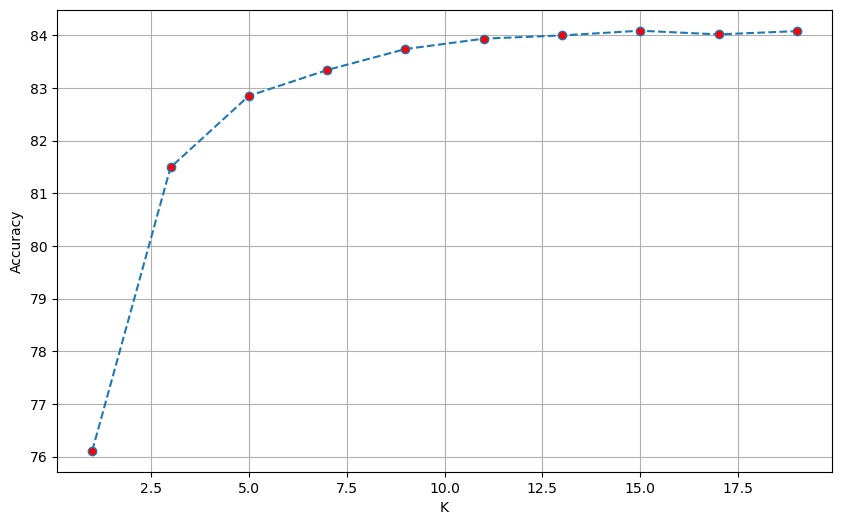

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20,2), acc_rate1, marker='o', markerfacecolor='red', linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('K')
plt.grid()
plt.show()

# KNN WITH SMOTE

In [22]:
from imblearn.over_sampling import SMOTE
# Split the data into training and testing sets
smote = SMOTE()
warnings.filterwarnings('ignore')

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [23]:

# Train your model on the new training set
# xgb_smote=xgboost.XGBClassifier()
knn_smote_start_time = time.time()
knn.fit(X_train_smote, y_train_smote)
knn_smote_end_time = time.time()

# Calculate the training time
knn_smote_training_time = knn_smote_end_time - knn_smote_start_time
print("Training time: {:.4f} seconds".format(knn_smote_training_time))
# Evaluate your model on the test set
ypred_knn_smot = knn.predict(X_test)
knn_smote_accuracy = accuracy_score(y_test,ypred_knn_smot)
print('Accuracy score :',knn_smote_accuracy)



Training time: 0.5200 seconds
Accuracy score : 0.583310766373941


In [24]:
cm_knn_smote = confusion_matrix(y_test, ypred_knn_smot)
print('Confusion matrix:\n', cm_knn_smote)
print('_________________________________________________________________________')
# Get the classification report
cr_knn_smote = classification_report(y_test, ypred_knn_smot)
print('Classification report:\n', cr_knn_smote)

Confusion matrix:
 [[13276  5625  2822]
 [ 1000  1612   841]
 [  123   360   190]]
_________________________________________________________________________
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.61      0.74     21723
           1       0.21      0.47      0.29      3453
           2       0.05      0.28      0.08       673

    accuracy                           0.58     25849
   macro avg       0.39      0.45      0.37     25849
weighted avg       0.80      0.58      0.66     25849



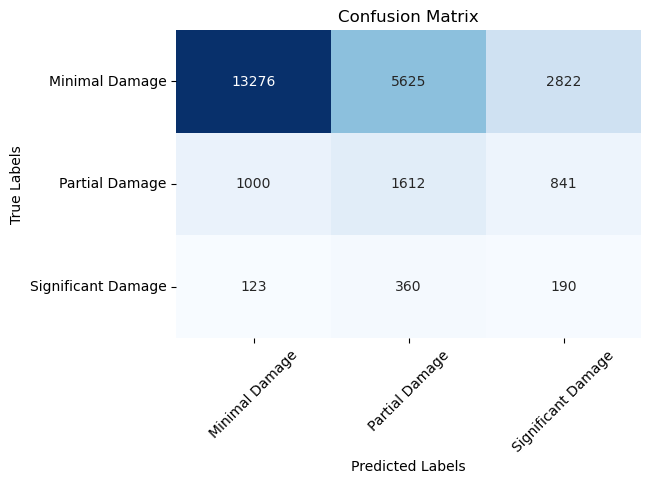

In [56]:
# cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_smote, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# KNN With hyper parameter tuning with smote

In [25]:
# define the parameter grid to search
param_grid = {
    'n_neighbors': range(1, 10, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# create a grid search object with cross-validation
grid_search = GridSearchCV(knn, param_grid)

start_time = time.time()

grid_search.fit(X_train_smote, y_train_smote)

end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training time: {:.4f} seconds".format(training_time))

# print the best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Training time: 331.2288 seconds
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.8064882353143451


In [28]:
# evaluate the model on the test set using the best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')
best_knn.fit(X_train_smote, y_train_smote)
y_pred_best = best_knn.predict(X_test)
acc_knn_best_fit = accuracy_score(y_pred_best, y_test)
print("KNN accuracy: ", acc_knn_best_fit )
cm_knn_best_fit = confusion_matrix(y_test, y_pred_best)
print('Confusion matrix:\n', cm_knn_best_fit)
print("\nClassification Report of KNN algortihm:\n ",classification_report(y_test,y_pred_best))


KNN accuracy:  0.6834693798599559
Confusion matrix:
 [[16299  4118  1306]
 [ 1810  1262   381]
 [  294   273   106]]

Classification Report of KNN algortihm:
                precision    recall  f1-score   support

           0       0.89      0.75      0.81     21723
           1       0.22      0.37      0.28      3453
           2       0.06      0.16      0.09       673

    accuracy                           0.68     25849
   macro avg       0.39      0.42      0.39     25849
weighted avg       0.78      0.68      0.72     25849



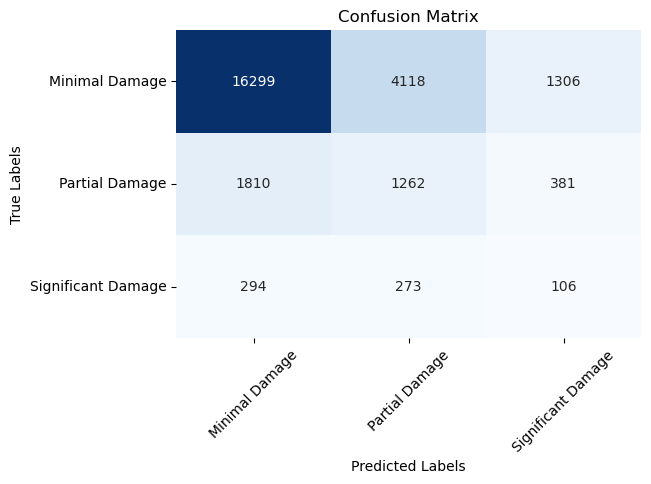

In [57]:
# cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn_best_fit, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

In [46]:
gnb = GaussianNB()

# Fit the model on the training data
gnd_start_time = time.time()

gnb.fit(X_train, y_train)

gnd_end_time = time.time()

# Calculate the training time
gnd_training_time = gnd_end_time - gnd_start_time
print("Training time: {:.4f} seconds".format(gnd_training_time))


# Predict on the test data
y_pred_gnb = gnb.predict(X_test)
accuracy_GNB = accuracy_score(y_test, y_pred_gnb)
print('Accuracy for GNB:', accuracy_GNB)


Training time: 0.0276 seconds
Accuracy for GNB: 0.8214631126929475


In [31]:
# Predict class probabilities on the test data
probabilities = gnb.predict_proba(X_test)

# Calculate the mean probability for each class
class_probabilities = probabilities.mean(axis=0)

# Define the class labels
class_labels = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Get the index of the class with the highest probability
predicted_class_index = class_probabilities.argmax()

# Get the class label with the highest probability
predicted_class = class_labels[predicted_class_index]

print('Predicted Class with the highest crop damage probabilities:', predicted_class)

Predicted Class with the highest crop damage probabilities: Minimal Damage


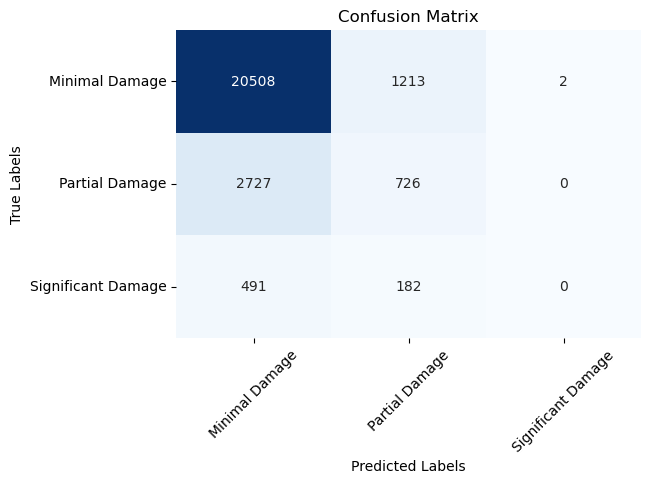

In [32]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:

# Assuming you have true labels in y_test and predicted labels in y_pred
class_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']  # Replace with your actual class names

# Generate the classification report
cr_gnb = classification_report(y_test, y_pred_gnb, target_names=class_names)

# Function to format text with ANSI escape codes
def color_text(text, color_code):
    return f"\033[{color_code}m{text}\033[0m"

# Print the classification report with color formatting
print(color_text("Classification Report:", "34"))  # Set the color code for blue text
print(cr_gnb)


Classification Report:
                    precision    recall  f1-score   support

    Minimal Damage       0.86      0.94      0.90     21723
    Partial Damage       0.34      0.21      0.26      3453
Significant Damage       0.00      0.00      0.00       673

          accuracy                           0.82     25849
         macro avg       0.40      0.38      0.39     25849
      weighted avg       0.77      0.82      0.79     25849



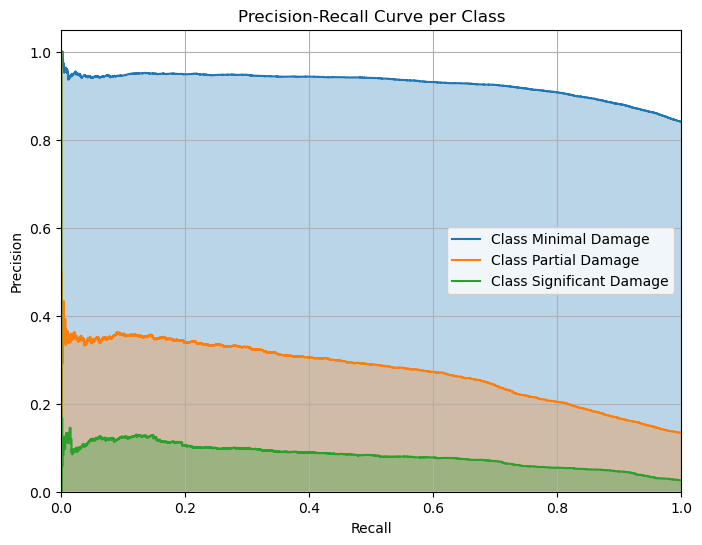

In [38]:
#### plotting Precision-Recall Curve for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report,precision_recall_curve
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict class probabilities on the test data
probabilities = gnb.predict_proba(X_test)

# Calculate precision and recall values for each class
precision = dict()
recall = dict()
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], probabilities[:, i])

# Plot the Precision-Recall Curves per class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.step(recall[i], precision[i], where='post', label='Class {}'.format(class_labels[i]))
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend()
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

# GNB with smote

In [45]:
gnb_smot = GaussianNB()

gnd_smot_start_time = time.time()

gnb_smot.fit(X_train_smote, y_train_smote)

gnd_smot_end_time = time.time()

# Calculate the training time
gnd_smot_training_time = gnd_smot_end_time - gnd_smot_start_time
print("Training time: {:.4f} seconds".format(gnd_smot_training_time))
# Fit the model on the training data


# Predict on the test data
y_pred_gnb_smot = gnb_smot.predict(X_test)
accuracy_GNB_smot = accuracy_score(y_test, y_pred_gnb_smot)
print('Accuracy for GNB:', accuracy_GNB_smot)


Training time: 0.0676 seconds
Accuracy for GNB: 0.6294634221826763


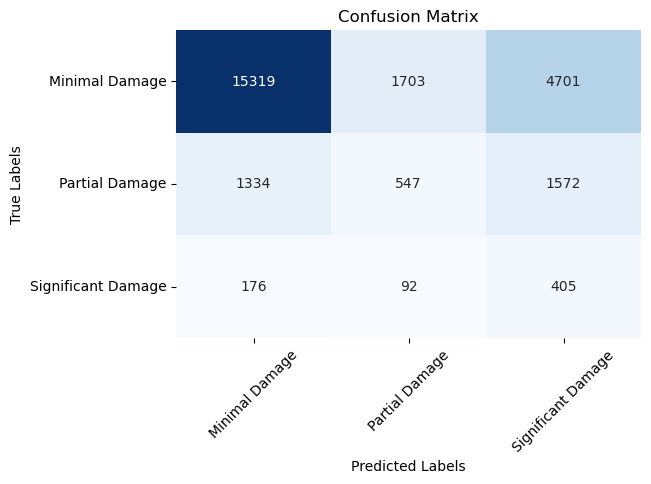

In [42]:
cm_gnb_smot = confusion_matrix(y_test, y_pred_gnb_smot)

# Define the label names
label_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gnb_smot, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=label_names, rotation=0)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:

# Assuming you have true labels in y_test and predicted labels in y_pred
class_names = ['Minimal Damage', 'Partial Damage', 'Significant Damage']  # Replace with your actual class names

# Generate the classification report
cr_gnb_smot = classification_report(y_test, y_pred_gnb_smot, target_names=class_names)

# Function to format text with ANSI escape codes
def color_text(text, color_code):
    return f"\033[{color_code}m{text}\033[0m"

# Print the classification report with color formatting
print(color_text("Classification Report:", "34"))  # Set the color code for blue text
print(cr_gnb_smot)


Classification Report:
                    precision    recall  f1-score   support

    Minimal Damage       0.91      0.71      0.79     21723
    Partial Damage       0.23      0.16      0.19      3453
Significant Damage       0.06      0.60      0.11       673

          accuracy                           0.63     25849
         macro avg       0.40      0.49      0.36     25849
      weighted avg       0.80      0.63      0.70     25849



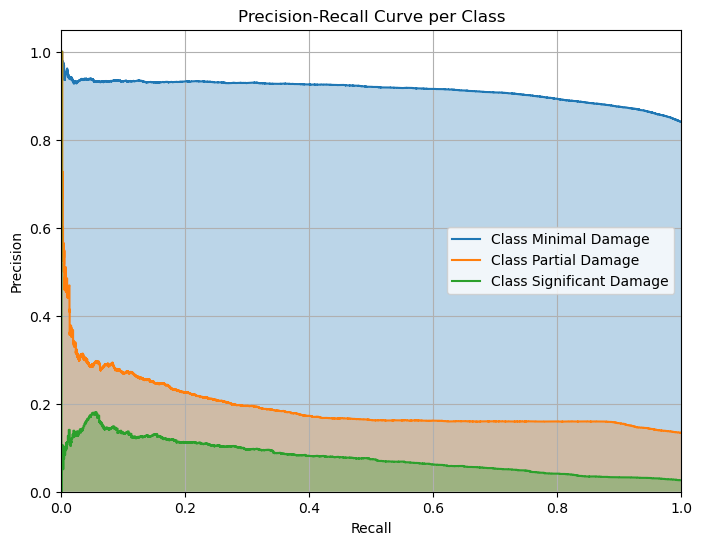

In [44]:
#### plotting Precision-Recall Curve for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score,roc_curve,auc,confusion_matrix,classification_report,precision_recall_curve
# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Predict class probabilities on the test data
probabilities = gnb_smot.predict_proba(X_test)

# Calculate precision and recall values for each class
precision = dict()
recall = dict()
for i in range(len(class_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], probabilities[:, i])

# Plot the Precision-Recall Curves per class
plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    plt.step(recall[i], precision[i], where='post', label='Class {}'.format(class_labels[i]))
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve per Class')
plt.legend()
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

In [ ]:
# GNB hyperparameter tuning with SMOTE

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}
gnb_hyp = GaussianNB()
grid_search = GridSearchCV(gnb_hyp, param_grid, cv=5, scoring='accuracy')

gnd_smot_hyp_start_time = time.time()

grid_search.fit(X_train_smote, y_train_smote)


gnd_smot_hyp_end_time = time.time() 

# Calculate the training time
gnd_smot_hyp_training_time = gnd_smot_hyp_end_time - gnd_smot_hyp_start_time
print("Training time: {:.4f} seconds".format(gnd_smot_hyp_training_time))

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Training time: 2.1102 seconds
Best parameters: {'var_smoothing': 1e-09}
Best score: 0.5491876989932853


In [61]:
gnb_best = GaussianNB(var_smoothing=best_params['var_smoothing'])
gnd_smot_hyp_start_time1 = time.time()
gnb_best.fit(X_train_smote, y_train_smote)

gnd_smot_hyp_end_time1 = time.time() 

# Calculate the training time
gnd_smot_hyp_training_time1 = gnd_smot_hyp_end_time1 - gnd_smot_hyp_start_time1
print("Training time: {:.4f} seconds".format(gnd_smot_hyp_training_time1))

y_pred1 = gnb_best.predict(X_test)  # Replace X_test with your test data
accuracy = accuracy_score(y_test, y_pred1)

print("Accuracy:", accuracy)

Training time: 0.0941 seconds
Accuracy: 0.438005338697822


In [58]:
best_model = grid_search.best_estimator_

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#  SVM

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
scaler = StandardScaler()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

import time

svm_model = SVC(kernel='linear')

svm_start_time = time.time()

# Train the SVM model on the training set
svm_model.fit(X_train, y_train)
svm_end_time = time.time()

# Calculate the training time
svm_training_time = svm_end_time - svm_start_time
print("Training time: {:.4f} seconds".format(svm_training_time))
# Predict the target variable for the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the performance of the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", svm_accuracy)

Training time: 56.1698 seconds
Accuracy: 0.8403806723664359


In [51]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix:\n', cm_svm)

Confusion matrix:
 [[21723     0     0]
 [ 3453     0     0]
 [  673     0     0]]


In [52]:
cr_svm = classification_report(y_test, y_pred_svm)
print('Classification report:\n', cr_svm)

Classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     21723
           1       0.00      0.00      0.00      3453
           2       0.00      0.00      0.00       673

    accuracy                           0.84     25849
   macro avg       0.28      0.33      0.30     25849
weighted avg       0.71      0.84      0.77     25849



# SVM with Smote

In [49]:
X_train_smote = pca.fit_transform(X_train_smote)
# X_test = pca.transform(X_test)
X_train_smote = scaler.fit_transform(X_train_smote)
# X_test = scaler.transform(X_test)


svm_model_smot = SVC(kernel='linear')

svm_smot_start_time = time.time()

# Train the SVM model on the training set
svm_model_smot.fit(X_train_smote, y_train_smote)
svm_smot_end_time = time.time()

# Calculate the training time
svm_smot_training_time = svm_smot_end_time - svm_smot_start_time
print("Training time: {:.4f} seconds".format(svm_smot_training_time))
# Predict the target variable for the test set
y_pred_svm_smot = svm_model_smot.predict(X_test)

# Evaluate the performance of the model
svm_accuracy_smot = accuracy_score(y_test, y_pred_svm_smot)
print("Accuracy:", svm_accuracy_smot)

Training time: 3617.6505 seconds
Accuracy: 0.43699949707919067


In [53]:
cm_svm_smot = confusion_matrix(y_test, y_pred_svm_smot)
print('Confusion matrix:\n', cm_svm_smot)

Confusion matrix:
 [[10129  3046  8548]
 [  647   644  2162]
 [   83    67   523]]


In [54]:
cr_svm_smot = classification_report(y_test, y_pred_svm_smot)
print('Classification report:\n', cr_svm_smot)

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.47      0.62     21723
           1       0.17      0.19      0.18      3453
           2       0.05      0.78      0.09       673

    accuracy                           0.44     25849
   macro avg       0.38      0.48      0.30     25849
weighted avg       0.81      0.44      0.55     25849



In [ ]:
import pickle

In [ ]:

x = np.array([[300,"Alluvial","Insecticides",0,2,3,"Summer"]])
x

In [ ]:
# x[:, ] = test_le_Crop_Type.transform(x[:,1])
x[:, 1] = test_le_Soil_Type.transform(x[:,1])
x[:, 6] = test_le_Season.transform(x[:,6])
x[:, 2] = test_le_Pesticide_Use_Category.transform(x[:,2])
x = x.astype(float)
x

In [ ]:

y_pred = xgb_smote.predict(x)
y_pred_original = le_Crop_Damage.inverse_transform(y_pred)
y_pred_original

In [ ]:

data = {"model": xgb_smote, "test_le_Soil_Type": test_le_Soil_Type,
        "test_le_Pesticide_Use_Category":test_le_Pesticide_Use_Category,
        "test_le_Season":test_le_Season}
with open('Cropdamage_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('Cropdamage_model.pkl', 'rb') as file:
    data = pickle.load(file)

xg_loaded = data["model"]
# le_Crop_Type = data["le_Crop_Type"]
test_le_Soil_Type = data["test_le_Soil_Type"]
test_le_Pesticide_Use_Category = data["test_le_Pesticide_Use_Category"]
test_le_Season = data["test_le_Season"]

In [ ]:
y_pred = xg_loaded.predict(x)
y_pred_original = test_le_Crop_Damage.inverse_transform(y_pred)
y_pred_original

In [ ]:

data_xg = {"model": grid_search, "test_le_Soil_Type": test_le_Soil_Type,
        "test_le_Pesticide_Use_Category":test_le_Pesticide_Use_Category,
        "test_le_Season":test_le_Season}
with open('Cropdamage_model_xg.pkl', 'wb') as file:
    pickle.dump(data_xg, file)

In [ ]:
with open('Cropdamage_model_xg.pkl', 'rb') as file:
    data_xg = pickle.load(file)

xg_hyp_model = data_xg["model"]
# le_Crop_Type = data["le_Crop_Type"]
test_le_Soil_Type = data_xg["test_le_Soil_Type"]
test_le_Pesticide_Use_Category = data_xg["test_le_Pesticide_Use_Category"]
test_le_Season = data_xg["test_le_Season"]

In [ ]:
y_pred_hyp = xg_hyp_model.predict(x)
y_pred_original = test_le_Crop_Damage.inverse_transform(y_pred_hyp)
y_pred_original